In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [321]:
df = pd.read_csv('ctc.csv')
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


>After importing the Python libraries and dataset, the columns names need to be separated by underscore as the following:

In [322]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,Ticket_#,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [323]:
df.shape

(2224, 11)

In [324]:
df.describe()

,Zip_code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket_#                     2224 non-null   object
 1   Customer_Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received_Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip_code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing_on_Behalf_of_Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


> Convert the type of Date and Date_month_year columns to datetime type:

In [326]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket_#                     2224 non-null   object        
 1   Customer_Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received_Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip_code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing_on_Behalf_of_Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

### The trend chart for the number of complaints at monthly and daily granularity levels:

In [327]:
df['Date_month_year'].value_counts()[:6]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
Name: Date_month_year, dtype: int64

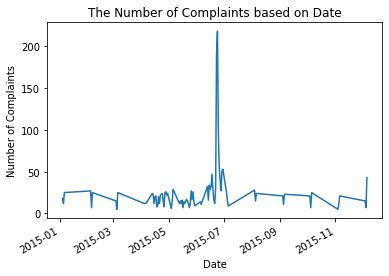

In [328]:
df['Date_month_year'].value_counts().plot();
plt.title('The Number of Complaints based on Date')
plt.xlabel('Date')
plt.ylabel('Number of Complaints');

>From the chart above, on 2015-07. It has the highest number of Complaints.

### The table with the frequency of complaint types:

In [329]:
df["index_d"] = df["Date_month_year"]
df["index_d"]

0      2015-04-22
1      2015-08-04
2      2015-04-18
3      2015-07-05
4      2015-05-26
          ...    
2219   2015-02-04
2220   2015-02-06
2221   2015-09-06
2222   2015-06-23
2223   2015-06-24
Name: index_d, Length: 2224, dtype: datetime64[ns]

In [330]:
df = df.set_index(df["index_d"])
df

,Ticket_#,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone,index_d
index_d,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22
2015-08-04,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04
2015-04-18,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05
2015-05-26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04,213550,Service Availability,2015-04-02,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04
2015-02-06,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06
2015-09-06,331188,complaint about comcast,2015-06-09,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06


>The table of the frequancy complaints types:

In [331]:
Freq_c =df.groupby(pd.Grouper(freq="M")).size()
Freq_c.index = Freq_c.index.strftime('%B')
Freq_c

index_d
January        55
February       59
March          45
April         375
May           317
June         1046
July           49
August         67
September      55
October        53
November       38
December       65
dtype: int64

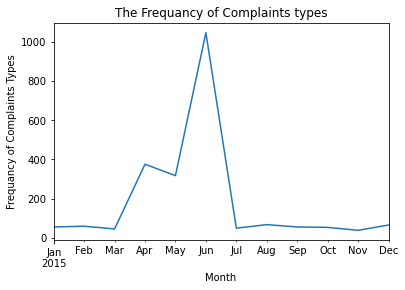

In [332]:
f = df.groupby(pd.Grouper(freq="M")).size().plot();
plt.title('The Frequancy of Complaints types')
plt.xlabel('Month')
plt.ylabel('Frequancy of Complaints Types');

> From the chart above, the frequency of complaints types have maximum value in June.

>Import Natural Language Toolkit and install the word cloud library to find which frequent word of complaints have the most occurrence:

In [333]:
import nltk
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [334]:
common_complaints = df['Customer_Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()
list_stops = ('Comcast','Company','Day','Call','Called')

for word in list_stops:
    STOPWORDS.add(word)

In [335]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=1500, height=1000).generate(common_complaints)

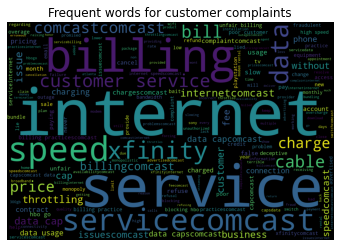

In [336]:
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Frequent words for customer complaints')
plt.show()

>From the above chart, the Frequent words for customer complaints in order: internet, service, and billing.

### The complaint type that have maximum number:

Text(0, 0.5, 'Total')

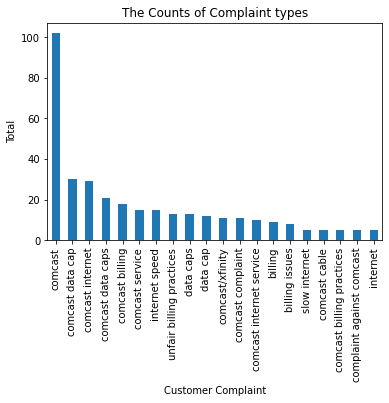

In [337]:
Freq_Customer_Complaint = df['Customer_Complaint'].str.lower().value_counts()
Freq_Customer_Complaint.head(20).plot(kind='bar')
plt.title('The Counts of Complaint types')
plt.xlabel('Customer Complaint')
plt.ylabel('Total')

In [338]:
Freq_Customer_Complaint = df['Customer_Complaint'].str.lower().value_counts()
Freq_Customer_Complaint.head(10)

comcast                     102
comcast data cap             30
comcast internet             29
comcast data caps            21
comcast billing              18
comcast service              15
internet speed               15
unfair billing practices     13
data caps                    13
data cap                     12
Name: Customer_Complaint, dtype: int64

> From the chart above, the complaints types that have highest number are comcast, comcast data cap, and comcast internet.

### Create a new categorical variable with value as Open and Closed:
Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed



In [339]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [340]:
df["StatusOfComplaint"] = ["Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in df["Status"]]

In [341]:
df.head()

,Ticket_#,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone,index_d,StatusOfComplaint
index_d,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,Closed
2015-08-04,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,Closed
2015-04-18,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,Closed
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,Open
2015-05-26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,Closed


In [342]:
StatusC = df.groupby(["State","StatusOfComplaint"]).size().unstack().fillna(0)
StatusC

StatusOfComplaint,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


 ### The state wise status of complaints in a stacked bar chart:

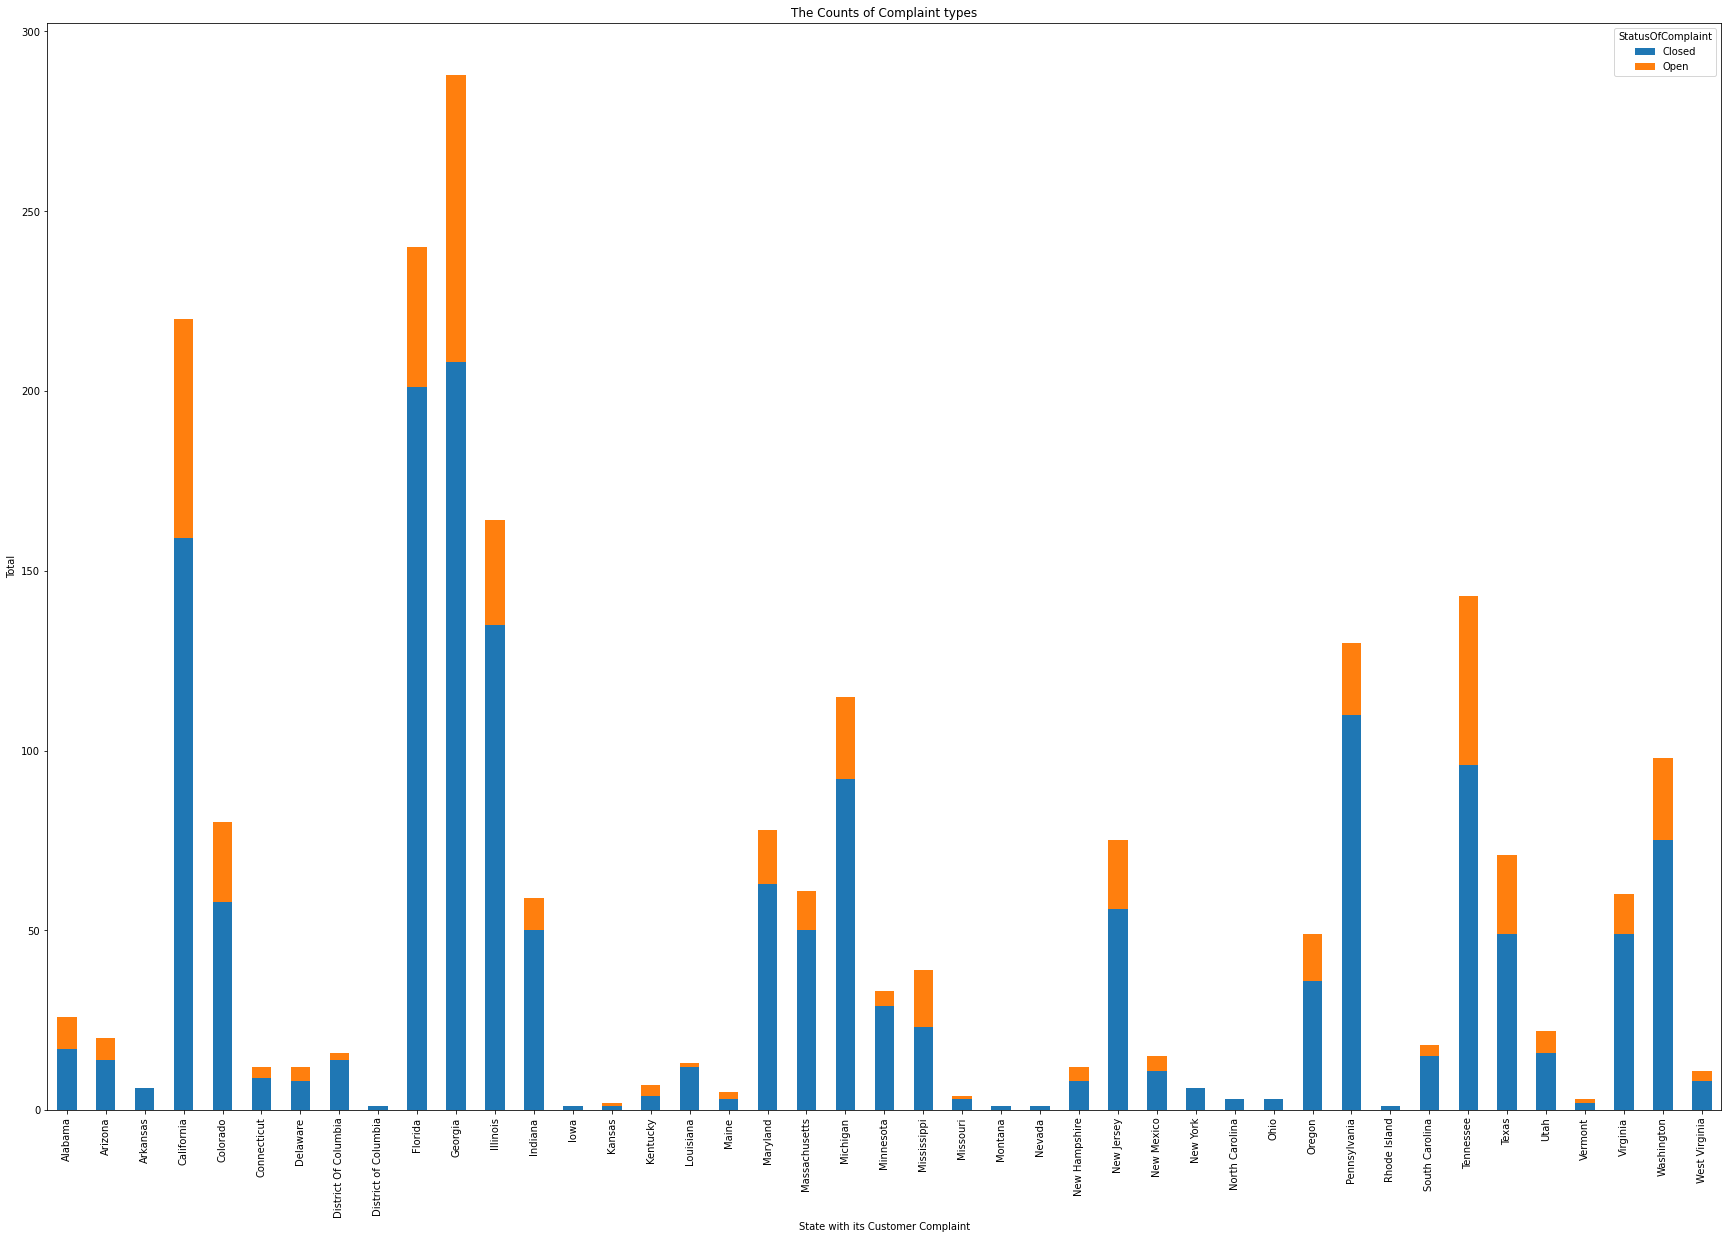

In [343]:
StatusC.plot(kind="bar", figsize=(30,20), stacked=True)
plt.title('The Counts of Complaint types')
plt.xlabel('State with its Customer Complaint')
plt.ylabel('Total');

> From the above chart, Georgia and Florida have the highest number of good response to the complaints.

### The state has the maximum complaints:

In [344]:
df.groupby(["State"]).size().sort_values(ascending=False)[:1]

State
Georgia    288
dtype: int64

>The state has the maximum complaints is Georgia with 288 complaints

### The state has the highest percentage of unresolved complaints:

In [345]:
s=df.groupby(["State","StatusOfComplaint"]).size().unstack().fillna(0).sort_values('Open',axis=0,ascending=False)[:1]
s

StatusOfComplaint,Closed,Open
State,,
Georgia,208.0,80.0


In [346]:
StatusC['unresolved_complaints'] = (StatusC['Open']/StatusC['Open'].sum()*100)
StatusC['unresolved_complaints'].sort_values(ascending=False).head(1)

State
Georgia    15.473888
Name: unresolved_complaints, dtype: float64

>The state has the highest percentage of unresolved complaints is Georgia with 15.47 

### The percentage of complaints resolved till date, which were received through the Internet and customer care calls:

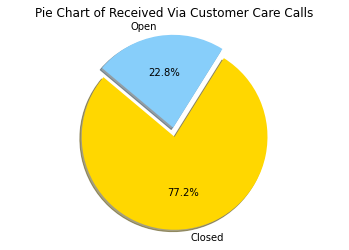

In [347]:
labels = 'Closed', 'Open'
sizes = [864, 255]
colors = ['gold','lightskyblue']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of Received Via Customer Care Calls')
plt.axis('equal')
plt.show()

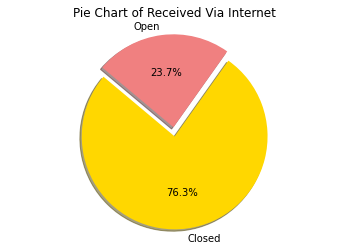

In [348]:
labels = 'Closed', 'Open'
sizes = [843, 262]
colors = ['gold','lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of Received Via Internet')
plt.axis('equal')
plt.show()